<a href="https://colab.research.google.com/github/Utkarsh-grow123/Deep-Learning/blob/main/image_classificarion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()])
batch_size=64
trainset=torchvision.datasets.CIFAR10(root='/sunbeam,',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset=torchvision.datasets.CIFAR10(root='./sunbeam',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /sunbeam,/cifar-10-python.tar.gz to /sunbeam,


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./sunbeam/cifar-10-python.tar.gz to ./sunbeam


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden=nn.Linear(32*32*3,256)
    self.hidden1=nn.Linear(256,128)
    self.hidden2=nn.Linear(128,64)
    self.output=nn.Linear(64,10)

  def forward(self,x):
    x = torch.flatten(x, 1)
    x = F.relu(self.hidden(x))
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = self.output(x)
    return x

net=Net()

In [ ]:
import torch.optim as optim

loss=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.01)


In [ ]:
train_accuracy=[]
train_losses=[]
def train(epoch):
  total_train=0
  running_loss=0.0
  correct=0
  for i, data in enumerate(trainloader,0):
    inputs, labels=data
    optimizer.zero_grad()
    outputs=net(inputs)
    losses= loss(outputs, labels)
    losses.backward()
    optimizer.step()
    running_loss+=losses.item()
    _, predicted=outputs.max(1)
    total_train+=labels.size(0)
    correct+=(predicted==labels).sum().item()
  train_loss=running_loss/len(trainloader)
  accuracy=100.*correct/total_train
  train_accuracy.append(accuracy)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Train Accuracy: %.3f'%(train_loss,accuracy))
    



In [ ]:
eval_losses=[]
eval_accu=[]

def test(epoch):
  cor=0
  total=0
  running_loss=0
  with torch.no_grad():
    for data in testloader:
      images,label=data
      output=net(images)
      losses= loss(output, label)
      running_loss+=losses.item()

      _,predicted=torch.max(output.data,1)
      total+=label.size(0)
      cor +=(predicted==label).sum().item()
  test_loss=running_loss/len(testloader)
  accuracy=100.*cor/total
  eval_losses.append(test_loss)
  eval_accu.append(accuracy)
  print('Test Loss: %.3f | Test Accuracy: %.3f'%(test_loss,accuracy)) 




In [ ]:
epochs=20
for epoch in range(1,epochs+1): 
  train(epoch)
  test(epoch)

Train Loss: 2.285 | Train Accuracy: 13.616
Test Loss: 2.248 | Test Accuracy: 18.000
Train Loss: 2.176 | Train Accuracy: 19.446
Test Loss: 2.133 | Test Accuracy: 22.480
Train Loss: 2.103 | Train Accuracy: 23.236
Test Loss: 2.090 | Test Accuracy: 24.260
Train Loss: 2.052 | Train Accuracy: 25.574
Test Loss: 2.047 | Test Accuracy: 25.420
Train Loss: 2.017 | Train Accuracy: 27.294
Test Loss: 2.013 | Test Accuracy: 27.760
Train Loss: 1.984 | Train Accuracy: 28.754
Test Loss: 1.973 | Test Accuracy: 30.030
Train Loss: 1.954 | Train Accuracy: 29.964
Test Loss: 1.940 | Test Accuracy: 30.510
Train Loss: 1.925 | Train Accuracy: 30.984
Test Loss: 1.926 | Test Accuracy: 31.100
Train Loss: 1.898 | Train Accuracy: 32.022
Test Loss: 1.889 | Test Accuracy: 32.520
Train Loss: 1.872 | Train Accuracy: 33.158
Test Loss: 1.856 | Test Accuracy: 33.820
Train Loss: 1.847 | Train Accuracy: 33.888
Test Loss: 1.852 | Test Accuracy: 33.370
Train Loss: 1.824 | Train Accuracy: 34.992
Test Loss: 1.849 | Test Accuracy:

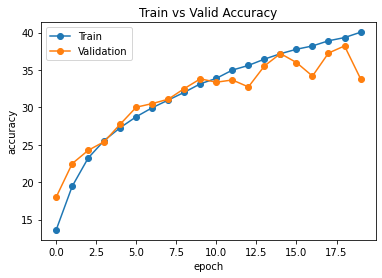

In [ ]:
plt.plot(train_accuracy,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'])
plt.title('Train vs Valid Accuracy')

plt.show()



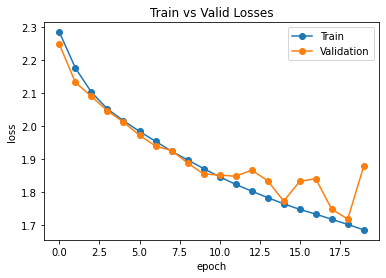

In [ ]:
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'])
plt.title('Train vs Valid Losses')

plt.show()
